In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [4]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/andSVM_2.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
dataNl.describe()

,X1,X2,y
count,7.000000,7.000000,7.000000
mean,1.000000,0.857143,0.428571
std,1.154701,1.345185,0.534522
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.500000,1.500000,1.000000
max,3.000000,3.000000,1.000000


Exactitud:  100.0 %


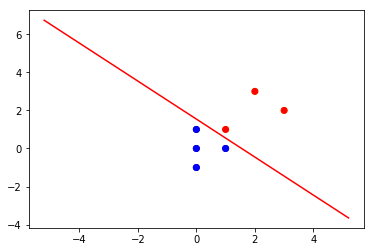

In [40]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"]).reshape(7,1)

#Declaración de variables:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

#Operaciones, grafo:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos

#Visualizar la partición del espacio:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.show()

#Cerrar sesión:
sess.close()

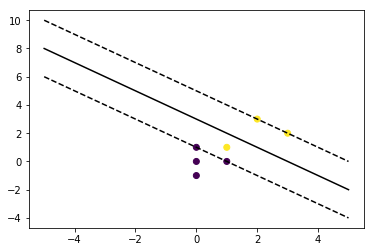

Error cuadrado medio: 14.2857142857 %


In [53]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"])

clf = SVC(C=1.0, kernel="linear")
clf.fit(X, Y)



w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0],X[:,1],c=Y)

plt.show()
e = np.mean((clf.predict(X)-Y)**2)*100
print("Error cuadrado medio:",e,"%")

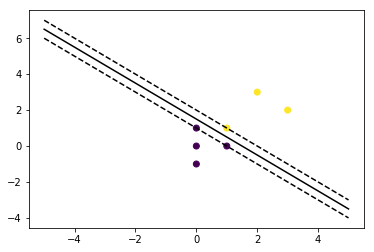

Error cuadrado medio: 0.0 %


In [54]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"])

clf = SVC(C=100.0, kernel="linear")
clf.fit(X, Y)



w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0],X[:,1],c=Y)

plt.show()
e = np.mean((clf.predict(X)-Y)**2)*100
print("Error cuadrado medio:",e,"%")

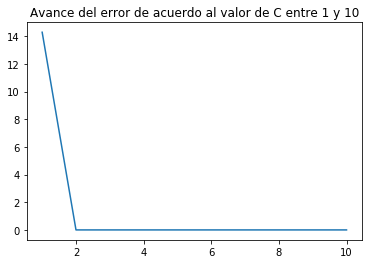

In [62]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"])
n = 10
e = np.zeros(n)
for i in range(1,n):
    clf = SVC(C=i, kernel="linear")
    clf.fit(X, Y)
    e[i-1] = np.mean((clf.predict(X)-Y)**2)*100
    
plt.plot(range(1,n+1),e)
plt.title("Avance del error de acuerdo al valor de C entre 1 y 10")
plt.show()